In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

In [186]:
main_color = '#2b326d'

In [187]:
df = pd.read_csv('starts.csv')
volunteers = pd.read_csv('volunteers.csv')
regions = pd.read_csv('regions.csv')

In [16]:
df.shape

(178857, 23)

In [91]:
df = df[(df['finish_time'] < 5000) & (df['athlete_age'] > 14) & (df['athlete_age'] < 80)]

In [92]:
df.shape

(167646, 23)

In [5]:
volunteers.shape

(72759, 8)

In [7]:
regions.shape

(87, 71)

In [ ]:
df

In [32]:
volunteers['athlete_age'].describe()

count    72759.000000
mean        37.726934
std         11.971236
min          4.000000
25%         33.000000
50%         38.000000
75%         44.000000
max        123.000000
Name: athlete_age, dtype: float64

In [45]:
volunteers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72759 entries, 0 to 72758
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   volunteering_record_id  72759 non-null  int64 
 1   event_name              72759 non-null  object
 2   event_date              72759 non-null  object
 3   athlete_id              72759 non-null  int64 
 4   athlete_gender          72759 non-null  object
 5   athlete_age             72759 non-null  int64 
 6   volunteer_role_id       72759 non-null  int64 
 7   volunteer_role_name     72759 non-null  object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


In [98]:
volunteers = volunteers[volunteers['athlete_age'] < 80]
volunteers.shape

(72680, 8)

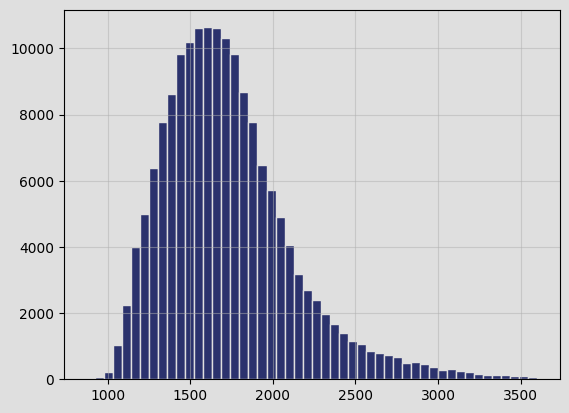

In [74]:
plt.hist(df['finish_time'], bins=50, color=main_color, edgecolor='#dfdfdf')
plt.grid(alpha=0.5)
fig = plt.gcf()  # Получаем текущую фигуру
fig.patch.set_facecolor('#dfdfdf')
ax = plt.gca()  # Получаем текущие оси
ax.set_facecolor('#dfdfdf')
plt.show()

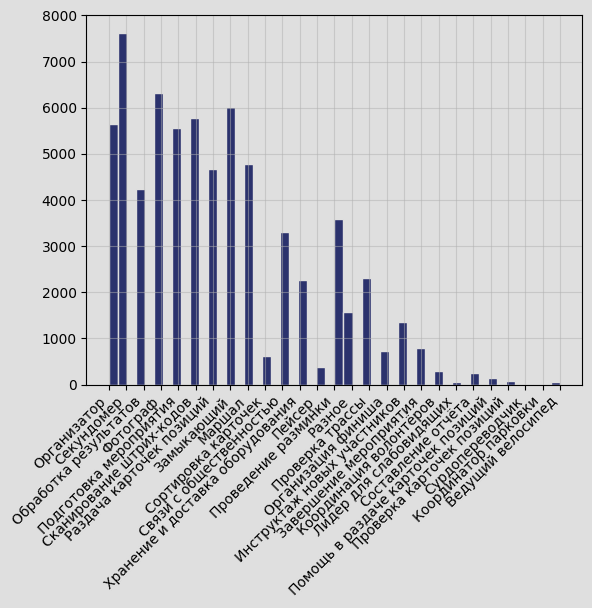

In [77]:
plt.hist(volunteers['volunteer_role_name'], bins=50, color=main_color, edgecolor='#dfdfdf')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)
fig = plt.gcf()  # Получаем текущую фигуру
fig.patch.set_facecolor('#dfdfdf')
ax = plt.gca()  # Получаем текущие оси
ax.set_facecolor('#dfdfdf')
plt.show()

In [ ]:
volunteers('athlete_gender')['']

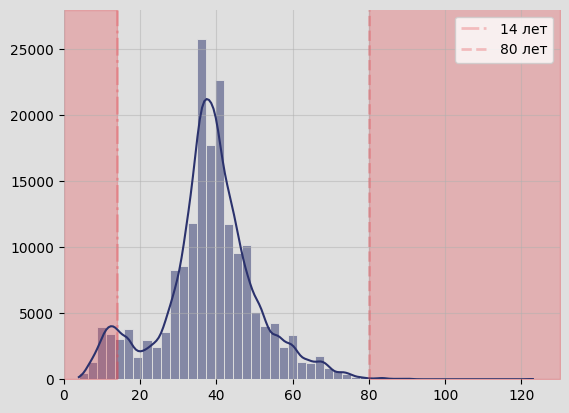

In [188]:



# Построение гистограммы с KDE
sns.histplot(df['athlete_age'], bins=50, kde=True, color=main_color, edgecolor='#dfdfdf')

# Получаем текущий объект осей
ax = plt.gca()

# Добавляем вертикальную линию на отметке 14 лет
ax.axvline(x=14, color='#e6454c', linestyle='-.', linewidth=2, label='14 лет', alpha=0.3)

# Заливаем область слева от линии
ax.fill_betweenx(y=[0, 28000], x1=0, x2=14, color='#e6454c', alpha=0.3)
ax.axvline(x=80, color='#e6454c', linestyle='--', linewidth=2, label='80 лет', alpha=0.3)

# Заливаем область слева от линии
ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=80, x2=130, color='#e6454c', alpha=0.3)

# Добавляем вертикальную линию на отметке 14 лет


# Заливаем всю область слева от линии
fig = plt.gcf()
fig.patch.set_facecolor('#dfdfdf')  # Цвет всего фона
ax.set_facecolor('#dfdfdf')  # Цвет фона области данных
ax.set_xlim(0, 130)
ax.set_ylim(0, 28000)
# Легенда и отображение
for spine in ax.spines.values():
    spine.set_visible(False)
plt.legend()
plt.xlabel(None)
plt.ylabel(None)
plt.grid(alpha=0.5)
plt.show()



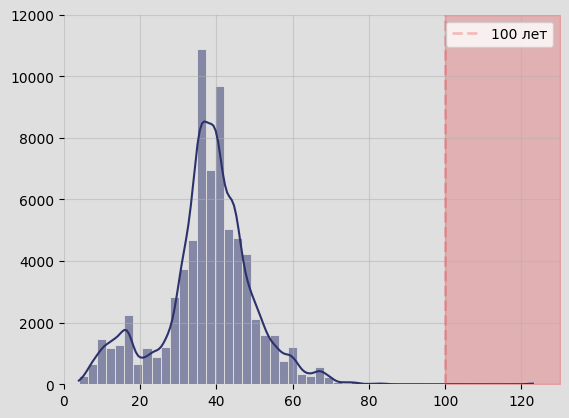

In [191]:
sns.histplot(volunteers['athlete_age'], bins=50, kde=True, color=main_color, edgecolor='#dfdfdf')

# Получаем текущий объект осей
ax = plt.gca()

# Добавляем вертикальную линию на отметке 14 лет

ax.axvline(x=100, color='#e6454c', linestyle='--', linewidth=2, label='100 лет', alpha=0.3)

# Заливаем область слева от линии
ax.fill_betweenx(y=[0, 12000], x1=100, x2=130, color='#e6454c', alpha=0.3)

# Добавляем вертикальную линию на отметке 14 лет


# Заливаем всю область слева от линии
fig = plt.gcf()
fig.patch.set_facecolor('#dfdfdf')  # Цвет всего фона
ax.set_facecolor('#dfdfdf')  # Цвет фона области данных
ax.set_xlim(0, 130)
ax.set_ylim(0, 12000)
# Легенда и отображение
for spine in ax.spines.values():
    spine.set_visible(False)
plt.legend()
plt.xlabel(None)
plt.ylabel(None)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
volont

In [ ]:
volunteers.groupby('')

In [172]:
df['event_date'] = pd.to_datetime(df['event_date'])
df = df.sort_values(by='event_date')
df['appears_later'] = 0

seen_ids = set()

for i in range(len(df) - 1, -1, -1):
    current_id = df.loc[i, 'athlete_id']
    if current_id in seen_ids:
        df.loc[i, 'appears_later'] = 1
    seen_ids.add(current_id) 

df.head(15)


,record_id,athlete_id,event_name,event_date,city,region,finish_time,athlete_gender,athlete_age,is_newbie,...,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface,appears_later
47592,4811,790093403,Ставрополь,2023-01-01,Ставрополь,Ставропольский край,2113,женский,41,0,...,1.32,100,2.66,220,Clouds,overcast clouds,NaN,NaN,твердое,1
69723,4839,790108203,Вернадского,2023-01-01,Москва,Москва,1602,мужской,21,0,...,0.88,100,5.46,215,Clouds,overcast clouds,NaN,NaN,асфальт,1
106513,4827,790124258,Мещерский,2023-01-01,Одинцово,Московская область,1884,женский,59,0,...,0.85,100,5.00,200,Drizzle,light intensity drizzle,NaN,NaN,"гранитная крошка, грунт",1
113691,4816,790126872,Петергоф Александрийский,2023-01-01,Санкт-Петербург,Санкт-Петербург,2920,женский,35,1,...,1.99,100,5.95,263,Clouds,overcast clouds,NaN,NaN,грунт,0
69720,4752,790108186,Новосибирск набережная,2023-01-01,Новосибирск,Новосибирская область,1771,женский,30,0,...,-8.23,100,3.30,161,Snow,light snow,NaN,0.19,асфальт,1
485,4811,790055693,Ставрополь,2023-01-01,Ставрополь,Ставропольский край,1770,женский,37,0,...,1.32,100,2.66,220,Clouds,overcast clouds,NaN,NaN,твердое,1
16795,4762,790068073,Сосновка,2023-01-01,Санкт-Петербург,Санкт-Петербург,1974,женский,34,0,...,1.17,100,7.56,263,Clouds,overcast clouds,NaN,NaN,грунт,1
5191,4839,790059117,Вернадского,2023-01-01,Москва,Москва,1904,мужской,36,0,...,0.88,100,5.46,215,Clouds,overcast clouds,NaN,NaN,асфальт,1
113518,4808,790126820,Зеленоград,2023-01-01,Москва,Москва,1928,мужской,52,0,...,0.77,100,6.00,200,Clouds,overcast clouds,NaN,NaN,грунт,0
38484,4814,790085711,Пушкин,2023-01-01,Санкт-Петербург,Санкт-Петербург,1694,мужской,46,0,...,0.69,75,8.00,260,Clouds,broken clouds,NaN,NaN,грунт,1


In [ ]:
newbie = df.groupby('athlete_id').first()
newbie.head(8)

,record_id,event_name,event_date,city,region,finish_time,athlete_gender,athlete_age,is_newbie,temp,...,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface,appears_later
athlete_id,,,,,,,,,,,,,,,,,,,,,
790055465,6490,Нижний пруд,2023-03-25,Калининград,Калининградская область,1260,мужской,43,1,7.90,...,6.36,25,3.67,223,Rain,light rain,0.10,NaN,"асфальт, бетон",1
790055474,9004,Битца,2023-07-08,Москва,Москва,2288,женский,35,0,18.75,...,17.59,97,3.50,351,Rain,light rain,0.41,0.31,грунт,1
790055476,5193,Парк Горького,2023-01-21,Москва,Москва,1267,мужской,32,0,-3.35,...,-5.97,100,3.56,149,Clouds,overcast clouds,0.93,0.21,твердое,1
790055489,5761,Парк Горького,2023-02-18,Москва,Москва,1486,мужской,35,0,-8.21,...,-9.66,96,5.76,152,Clouds,overcast clouds,0.93,0.21,твердое,1
790055490,5501,Михалково,2023-02-04,Москва,Москва,1413,мужской,52,0,-1.91,...,-2.27,51,2.01,352,Clouds,broken clouds,0.12,NaN,смешанное,1
790055533,6755,Бутово,2023-04-08,Москва,Москва,1222,мужской,35,1,5.48,...,-3.17,0,3.00,110,Clear,clear sky,NaN,NaN,смешанное,0
790055540,4827,Мещерский,2023-01-01,Одинцово,Московская область,1522,мужской,48,0,0.85,...,0.85,100,5.00,200,Drizzle,light intensity drizzle,0.93,0.21,"гранитная крошка, грунт",1
790055547,5259,Филатов Луг,2023-01-28,Москва,Москва,1230,мужской,60,0,-3.02,...,-3.88,100,3.13,10,Snow,light snow,0.93,NaN,твердое,1


In [177]:
volunteers['event_date'] = pd.to_datetime(volunteers['event_date'])
volunteers = volunteers.groupby('athlete_id').first()

In [178]:
newbie = newbie[newbie['is_newbie'] == 1]

In [179]:
result = pd.merge(newbie, volunteers, on=['athlete_id', 'event_name', 'event_date'], how='inner')
result.shape

(391, 28)

In [181]:
(result['appears_later'] == 1).mean()

np.float64(0.5268542199488491)

In [180]:
result.groupby('athlete_id')

In [182]:
young = volunteers[volunteers['athlete_age'] < 14]
young['volunteer_role_name'].value_counts()

volunteer_role_name
Маршал                               232
Раздача карточек позиций             185
Замыкающий                            71
Сканирование штрих-кодов              69
Организация финиша                    67
Секундомер                            48
Разное                                42
Помощь в раздаче карточек позиций     41
Сортировка карточек                   29
Фотограф                              25
Подготовка мероприятия                25
Завершение мероприятия                22
Проведение разминки                   14
Проверка трассы                        9
Хранение и доставка оборудования       4
Проверка карточек позиций              4
Пейсер                                 2
Связи с общественностью                2
Организатор                            1
Name: count, dtype: int64